# Canonical Discriminant Analysis on Iris dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from seaborn import load_dataset
import pandas as pd

iris = load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# Chargement de la 
from discrimintools import CANDISC

candisc = CANDISC(n_components=2,target=["species"],parallelize=False)
# Instanciattion
candisc.fit(iris)

CANDISC(n_components=2, target=['species'])

## Summary Information

### Summary information

In [4]:
# Summary Information
candisc.summary_information_

,infos,Value,DF,DF value
0,Total Sample Size,150,DF Total,149
1,Variables,4,DF Within Classes,147
2,Classes,3,DF Between Classes,2


### Class level Information

In [5]:
# Class level information
candisc.statistics_["information"]

,Frequency,Proportion
species,,
setosa,50,0.333333
versicolor,50,0.333333
virginica,50,0.333333


## Squared Mahalanobis Distances and Distance statistics

### Squared Distance to Species

In [6]:
# Squared Distance to Species
candisc.classes_["mahalanobis"]

,setosa,versicolor,virginica
setosa,0.000000,89.864186,179.384713
versicolor,89.864186,0.000000,17.201066
virginica,179.384713,17.201066,0.000000


## Univariate and Multivariate Statistics

### Univariate Test Statistics

In [7]:
# Univariate statistics
candisc.statistics_["univariate"]

,Std. Dev.,R-squared,Rsq/(1-Rsq),F-statistic,Prob (F-statistic)
sepal_length,0.828066,0.618706,1.622646,119.264502,1.669669e-31
sepal_width,0.435866,0.400783,0.668844,49.160040,4.492017e-17
petal_length,1.765298,0.941372,16.056615,1180.161182,2.856777e-91
petal_width,0.762238,0.928883,13.061322,960.007147,4.169446e-85


### Manova test

In [8]:
# MANOVA
print(candisc.statistics_["manova"])

                   Multivariate linear model
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.0000   53.4665 0.0000
 Hotelling-Lawley trace 32.4773 8.0000 203.4024  582.1970 0.0000
    Roy's greatest root 32.1919 4.0000 145.0000 1166.9574 0.0000



### Anova

In [9]:
for key in candisc.statistics_["anova"].keys():
    print(key)
    print(candisc.statistics_["anova"][key])

sepal_length
               sum_sq     df    mean_sq           F        PR(>F)    eta_sq  \
C(species)  63.212133    2.0  31.606067  119.264502  1.669669e-31  0.618706   
Residual    38.956200  147.0   0.265008         NaN           NaN       NaN   

            omega_sq  
C(species)  0.611931  
Residual         NaN  
sepal_width
               sum_sq     df   mean_sq         F        PR(>F)    eta_sq  \
C(species)  11.344933    2.0  5.672467  49.16004  4.492017e-17  0.400783   
Residual    16.962000  147.0  0.115388       NaN           NaN       NaN   

            omega_sq  
C(species)  0.391036  
Residual         NaN  
petal_length
              sum_sq     df     mean_sq            F        PR(>F)    eta_sq  \
C(species)  437.1028    2.0  218.551400  1180.161182  2.856777e-91  0.941372   
Residual     27.2226  147.0    0.185188          NaN           NaN       NaN   

            omega_sq  
C(species)  0.940199  
Residual         NaN  
petal_width
               sum_sq     df    mea

### Correlation ratio

In [10]:
candisc.statistics_["Eta2"]

,Sum. Intra,Sum. Inter,Eta2,F-stats,pvalue
sepal_length,38.9562,63.2121,0.6187,119.2645,0.0
sepal_width,16.9620,11.3449,0.4008,49.1600,0.0
petal_length,27.2226,437.1028,0.9414,1180.1612,0.0
petal_width,6.1566,80.4133,0.9289,960.0071,0.0


## Canonical Correlations and Eigenvalues

### Eigenvalues

In [11]:
candisc.eig_

,Eigenvalue,Difference,Proportion,Cumulative
LD1,32.191929,31.906538,99.12126,99.12126
LD2,0.285391,NaN,0.87874,100.00000


### Likelihood ratio test

In [12]:
candisc.statistics_["likelihood_test"]

,statistic,DDL num.,DDL den.,Pr>F
0,199.145344,8.0,288.0,1.110223e-16
1,13.793900,3.0,145.0,5.794465e-08


## Correlations between Canonical and Original Variables

### Total Canonical Structure

In [13]:
candisc.corr_["total"]

,LD1,LD2
sepal_length,0.791888,0.217593
sepal_width,-0.530759,0.757989
petal_length,0.984951,0.046037
petal_width,0.972812,0.222902


### Between Canonical Structure

In [14]:
candisc.corr_["between"]

,LD1,LD2
sepal_length,0.991468,0.130348
sepal_width,-0.825658,0.564171
petal_length,0.999750,0.022358
petal_width,0.994044,0.108977


### Polled Within Canonical Structure

In [15]:
candisc.corr_["within"]

,LD1,LD2
sepal_length,0.222596,0.310812
sepal_width,-0.119012,0.863681
petal_length,0.706065,0.167701
petal_width,0.633178,0.737242


## Canonical Coefficients

### Raw Canonical Coefficients

In [16]:
candisc.coef_

,LD1,LD2
sepal_length,-0.829378,0.024102
sepal_width,-1.534473,2.164521
petal_length,2.201212,-0.931921
petal_width,2.810460,2.839188


## Canonical Means

In [17]:
candisc.classes_["coord"]

,LD1,LD2
species,,
setosa,-7.607600,0.215133
versicolor,1.825049,-0.727900
virginica,5.782550,0.512767


## Extractions

In [18]:
from discrimintools import get_candisc, summaryCANDISC
ind = get_candisc(candisc,choice="ind")
vcov = get_candisc(candisc,choice="covariance")
corr = get_candisc(candisc,choice="correlation")
coef = get_candisc(candisc,choice="absolute")
score_coef = get_candisc(candisc,choice="score")

In [19]:
summaryCANDISC(candisc)

                     Canonical Discriminant Analysis - Results                     


Summary Information

               infos  Value                  DF  DF value
0  Total Sample Size    150            DF Total       149
1          Variables      4   DF Within Classes       147
2            Classes      3  DF Between Classes         2

Class Level information

            Frequency  Proportion
species                          
setosa             50    0.333333
versicolor         50    0.333333
virginica          50    0.333333

Importance of components
                         LD1      LD2
Variance              32.192    0.285
Difference            31.907      NaN
% of var.             99.121    0.879
Cumulative % of var.  99.121  100.000

Test of H0: The canonical correlations in the current row and all that follow are zero

   statistic  DDL num.  DDL den.  Pr>F
0    199.145       8.0     288.0   0.0
1     13.794       3.0     145.0   0.0

Group means:

              setosa  versic

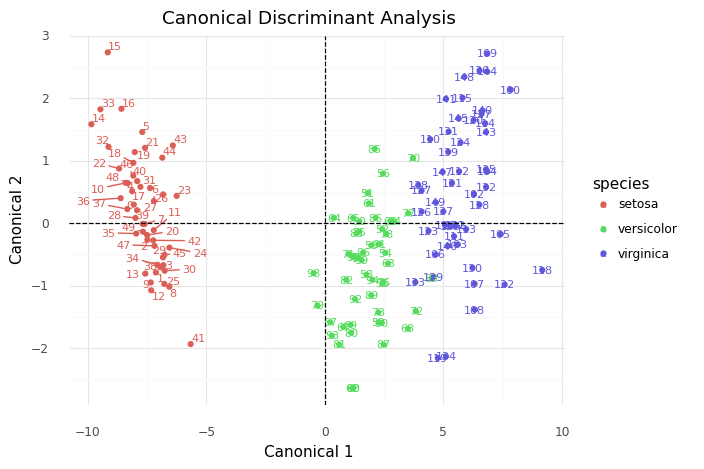

In [23]:
from discrimintools import fviz_candisc
p = fviz_candisc(candisc,repel=True)
print(p)